# The Sparks Foundation

## Graduate Rotational Internship Program(GRIP) APR2021-batch

## Task 1- Predict the percentage of an student based on the no. of study hours. 

#### By: P.Rama Krishna

In [1]:
#Importing all the required libraries

import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import r2_score ,accuracy_score,mean_absolute_error ,adjusted_rand_score

### Importing And Reading The Dataset

In [2]:
#Loading the dataset
data=pd.read_csv('http://bit.ly/w-data')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#checking the shape of the data
data.shape

(25, 2)

In [5]:
#Checking for missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
#Finding the statastical description of the given data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
#Finding the data types and summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


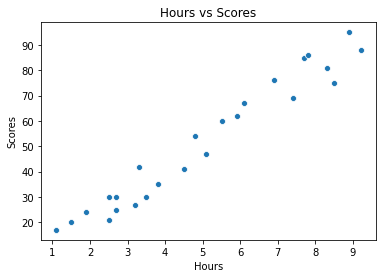

In [8]:
#Try to observe the relationship between the data
sns.scatterplot(data=data,x='Hours',y='Scores')
plt.title('Hours vs Scores')
plt.show()


#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

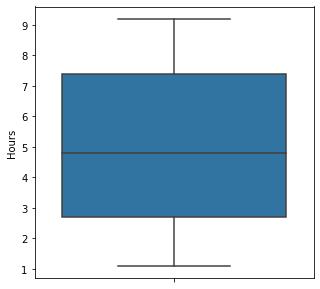

In [9]:
#Checking for outliers
plt.figure(figsize=(5,5))
sns.boxplot(data=data,x='Hours',orient='v')

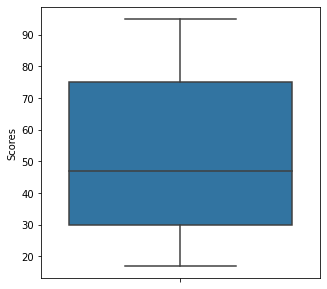

In [10]:
plt.figure(figsize=(5,5))
sns.boxplot(data=data,x='Scores',orient='v')

##### From the above boxplot we can conclude that there are no outliers in the given data

#### Preparing the linear regression model for the above data set, and we have already imported the libraries at the begining

In [11]:
#Selecting x- label and y label from the given data
X = data.drop(columns = ['Scores'])
y = data['Scores']

In [12]:
 #let's split our data in test and training set.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [13]:
#Preparing the LINEAR REGRESSION MODEL
LR= LinearRegression()
LR.fit(X_train,y_train)
print('Training Complete.')

Training Complete.


In [14]:
#lets check the model performance on test data
y_pred=LR.predict(X_test)
#Comparing  Actual vs Predicted
a=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
a

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


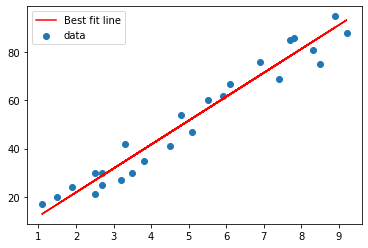

In [15]:
# Plotting the regression line
line = LR.coef_*X+LR.intercept_

# Plotting for the test data
plt.scatter(X, y,label='data')
plt.plot(X, line,label='Best fit line',color='r');
plt.legend()
plt.show()

In [16]:
#Accuracy of the model
LR.score(X_test,y_test)

0.9367661043365055

### Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [17]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.130879918502486


### Making prediction real time on user given input

In [21]:
hours=float(input())
own_pred=LR.predict([[hours]])
print('No of hours ={}'.format(hours))
print('Predicted score={}'.format(own_pred[0]))

9.25
No of hours =9.25
Predicted score=93.89272889341655
